In [1]:
import numpy as np

from stable_baselines3 import PPO
from stable_baselines3 import A2C
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.env_checker import check_env

In [2]:
from ipywidgets import IntProgress
from IPython.display import display

In [3]:
from cost_calculator_factory import CostCalculatorFactory
from multibinary_converter import MultiBinaryConverter
from multidiscrete_converter import MultiDiscreteConverter
from fitness_calculator import FitnessCalculator

In [4]:
from rl_multibinary_config import RlMultiBinaryConfig
from rl_multidiscrete_config import RlMultiDiscreteConfig
from rl_graphic import RlGraphic
from rl_env import RlEnv
from rl_solver import RlSolver

In [5]:
dtype = np.int64

In [6]:
l = 1
n = 5
m = 4
k = 3

In [7]:
T = np.array([
    [  1,   0,   0,   0],
    [0.5, 0.5,   0,   0],
    [  0, 0.5, 0.5,   0],
    [  0,   0, 0.5, 0.5],
    [  0,   0,   0,   1]
])

In [8]:
D = np.array([
    [0, 0, 1, 0],
    [0, 0, 1, 1],
    [0, 0, 0, 0],
    [0, 0, 0, 0]
])

In [9]:
C = np.array([
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1]
])

In [10]:
E = np.array([
    [1, 0, 0, 0, 0]
])

In [11]:
total_timesteps = 1000

In [12]:
cost_calculator_factory = CostCalculatorFactory(T, D, C, E)

In [13]:
# MultiBinary

In [14]:
multibinary_config = RlMultiBinaryConfig(m, k, dtype)

In [15]:
multibinary_converter = MultiBinaryConverter(m, k)
multibinary_fitness_calcultor = FitnessCalculator(cost_calculator_factory, multibinary_converter)

In [16]:
multibinary_progress = IntProgress(min=0, max=total_timesteps, value=0, description='multibinary', bar_style='success')
multibinary_graphic = RlGraphic('multibinary')
multibinary_optimisation_task_env = RlEnv(multibinary_config, multibinary_fitness_calcultor, multibinary_progress, multibinary_graphic)
check_env(multibinary_optimisation_task_env)
# policies: MlpPolicy
# algorithms: A2C, PPO
multibinary_model = A2C("MlpPolicy", multibinary_optimisation_task_env)

In [17]:
rl_multibinary_solver = RlSolver(multibinary_model, multibinary_progress)
display(multibinary_progress)
rl_multibinary_solver.solve()

IntProgress(value=11, bar_style='success', description='multibinary', max=1000)

(np.float64(1.0), array([1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0]))

In [18]:
# MultiDiscrete

In [19]:
multidiscrete_config = RlMultiDiscreteConfig(m, k, dtype)

In [20]:
multidiscrete_converter = MultiDiscreteConverter(m, k)
multidiscrete_fitness_calculator = FitnessCalculator(cost_calculator_factory, multidiscrete_converter)

In [21]:
multidiscrete_progress = IntProgress(min=0, max=total_timesteps, value=0, description='multidiscrete', bar_style='success')
multidiscrete_graphic = RlGraphic('multidiscrete')
multidiscrete_optimisation_task_env = RlEnv(multidiscrete_config, multidiscrete_fitness_calculator, multidiscrete_progress, multidiscrete_graphic)
check_env(multidiscrete_optimisation_task_env)
multidiscrete_model = A2C("MlpPolicy", multidiscrete_optimisation_task_env)

In [22]:
rl_multidiscrete_solver = RlSolver(multidiscrete_model, multidiscrete_progress)
display(multidiscrete_progress)
rl_multidiscrete_solver.solve()

IntProgress(value=11, bar_style='success', description='multidiscrete', max=1000)

(np.float64(1.0), array([0, 2, 0, 1]))

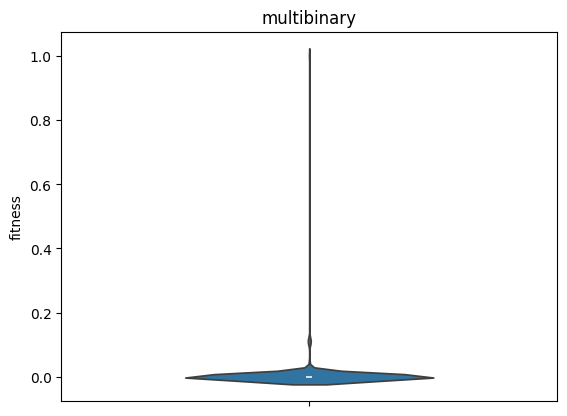

In [23]:
rl_multibinary_solver.plot()

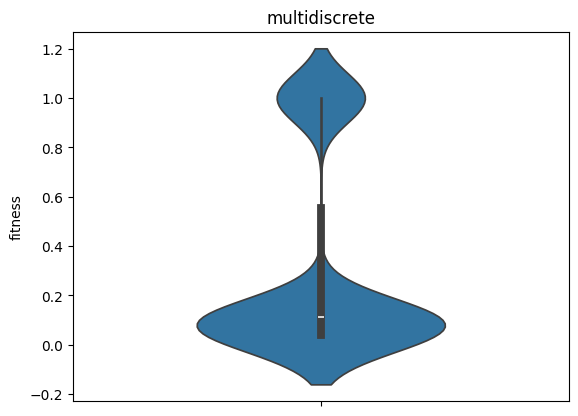

In [24]:
rl_multidiscrete_solver.plot()